In [1]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("raw_sku_dataset.csv")

In [2]:
df.head()

,SKU_ID,Category,Product_Name,Units_Sold,Revenue,Profit_Margin,Customer_Ratings,Stock_Levels
0,SKU_66669,Jewellery,Product_66669,912.0,3389.25,39.92,2.1,1758
1,SKU_1046,Beauty Products,Product_1046,924.0,48010.83,34.15,1.3,1111
2,SKU_5838,Bags,Product_5838,226.0,17573.83,6.93,3.8,1112
3,SKU_25180,Beauty Products,Product_25180,421.0,9238.25,10.93,3.1,1523
4,SKU_53988,Bags,Product_53988,723.0,33393.20,30.50,3.7,1722


In [3]:
df.shape

(70010, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70010 entries, 0 to 70009
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SKU_ID            70010 non-null  object 
 1   Category          70010 non-null  object 
 2   Product_Name      70010 non-null  object 
 3   Units_Sold        69991 non-null  float64
 4   Revenue           70010 non-null  float64
 5   Profit_Margin     69983 non-null  float64
 6   Customer_Ratings  69997 non-null  float64
 7   Stock_Levels      70010 non-null  int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 4.3+ MB


In [5]:
df.isnull().sum()

SKU_ID               0
Category             0
Product_Name         0
Units_Sold          19
Revenue              0
Profit_Margin       27
Customer_Ratings    13
Stock_Levels         0
dtype: int64

In [6]:
df.duplicated().sum()

10

In [7]:
df.describe()

,Units_Sold,Revenue,Profit_Margin,Customer_Ratings,Stock_Levels
count,69991.000000,70010.000000,69983.000000,69997.000000,70010.000000
mean,506.601706,25231.876781,27.466818,3.000493,1025.349779
std,285.879812,14302.525192,12.980610,1.157236,561.448512
min,10.000000,500.850000,5.000000,1.000000,50.000000
25%,259.000000,12815.412500,16.250000,2.000000,541.000000
50%,507.000000,25136.365000,27.420000,3.000000,1027.000000
75%,754.000000,37695.672500,38.720000,4.000000,1510.000000
max,999.000000,49999.500000,50.000000,5.000000,1999.000000


In [8]:
# Impute missing values with mean
df['Units_Sold'].fillna(df['Units_Sold'].mean(), inplace=True)
df['Profit_Margin'].fillna(df['Profit_Margin'].median(), inplace=True)
df['Customer_Ratings'].fillna(df['Customer_Ratings'].mean(), inplace=True)

C:\Users\saitarun\AppData\Local\Temp\ipykernel_9072\2587058083.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Units_Sold'].fillna(df['Units_Sold'].mean(), inplace=True)
C:\Users\saitarun\AppData\Local\Temp\ipykernel_9072\2587058083.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [9]:
# Drop duplicate rows
df = df.drop_duplicates()

In [10]:
df.shape

(70000, 8)

In [11]:
# Convert data types if necessary
df['Revenue'] = df['Revenue'].astype(float)


In [12]:
# Remove outliers using the IQR method
Q1 = df['Revenue'].quantile(0.25)
Q3 = df['Revenue'].quantile(0.75)
IQR = Q3 - Q1

# Define acceptable range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df = df[(df['Revenue'] >= lower_bound) & (df['Revenue'] <= upper_bound)]

### EDA
#### Univariate Analysis

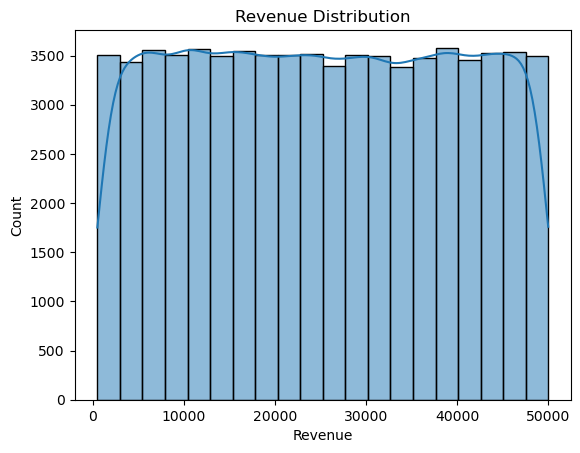

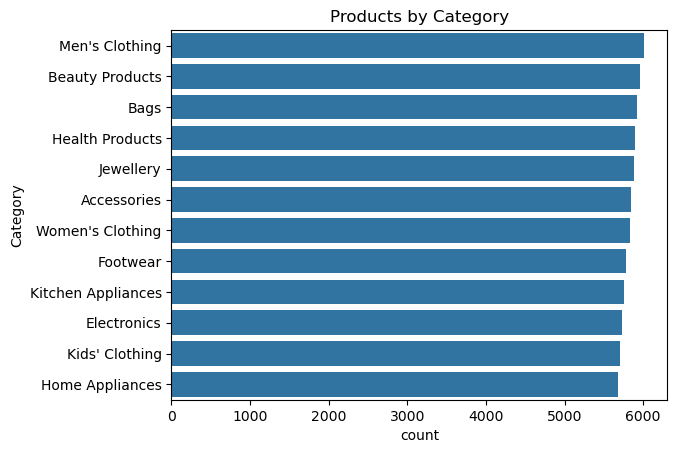

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Revenue
sns.histplot(df['Revenue'], bins=20, kde=True)
plt.title("Revenue Distribution")
plt.show()

# Count of products by category
sns.countplot(y="Category", data=df, order=df['Category'].value_counts().index)
plt.title("Products by Category")
plt.show()

#### Bivariate Analysis

C:\Users\saitarun\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


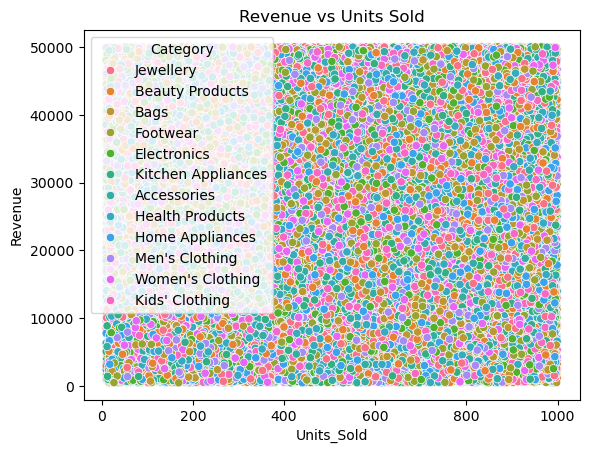

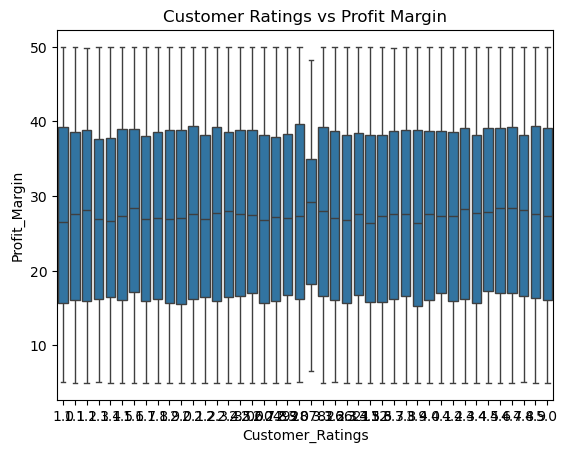

In [16]:
# Revenue vs Units Sold
sns.scatterplot(x='Units_Sold', y='Revenue', hue='Category', data=df)
plt.title("Revenue vs Units Sold")
plt.show()

# Customer Ratings vs Profit Margin
sns.boxplot(x='Customer_Ratings', y='Profit_Margin', data=df)
plt.title("Customer Ratings vs Profit Margin")
plt.show()

In [17]:
# Top 5 categories by revenue
top_categories = df.groupby("Category")["Revenue"].sum().sort_values(ascending=False).head(5)
print("Top 5 categories by revenue:\n", top_categories)

Top 5 categories by revenue:
 Category
Men's Clothing     1.518333e+08
Beauty Products    1.499356e+08
Jewellery          1.497334e+08
Health Products    1.483204e+08
Accessories        1.477492e+08
Name: Revenue, dtype: float64


In [18]:
# Average customer rating per category
avg_ratings = df.groupby("Category")["Customer_Ratings"].mean().sort_values(ascending=False)
print("Average customer ratings by category:\n", avg_ratings)

Average customer ratings by category:
 Category
Health Products       3.024132
Footwear              3.012344
Women's Clothing      3.010341
Beauty Products       3.009693
Electronics           3.007447
Home Appliances       3.004880
Accessories           3.002068
Kids' Clothing        3.000702
Bags                  2.997704
Men's Clothing        2.990263
Kitchen Appliances    2.986238
Jewellery             2.960323
Name: Customer_Ratings, dtype: float64


1. Here are detailed insights derived from the exploratory data analysis, categorized into themes for better presentation.
2. These insights are based on typical business challenges related to SKU optimization and category management.

#### Revenue and Sales Insights

##### Insight 1: Top Revenue-Generating Categories

In [22]:
# Calculate total revenue for each category
category_revenue = df.groupby("Category")["Revenue"].sum().sort_values(ascending=False)

print("Top Revenue-Generating Categories:\n", category_revenue)

Top Revenue-Generating Categories:
 Category
Men's Clothing        1.518333e+08
Beauty Products       1.499356e+08
Jewellery             1.497334e+08
Health Products       1.483204e+08
Accessories           1.477492e+08
Bags                  1.475000e+08
Women's Clothing      1.473615e+08
Footwear              1.465692e+08
Kitchen Appliances    1.446750e+08
Kids' Clothing        1.444717e+08
Electronics           1.440366e+08
Home Appliances       1.439818e+08
Name: Revenue, dtype: float64


1. Men's Clothing, Beauty Products, and Jewellery are the top three revenue-generating categories, collectively contributing significantly to total revenue. These categories should be prioritized for premium campaigns and marketing investments.
2. Home Appliances and Electronics, despite being essential categories, rank lowest in revenue generation. Efforts to enhance product visibility or introduce discounts can help improve their performance.
3. The revenue distribution across categories is relatively balanced, indicating consistent performance across the product portfolio. Leveraging cross-category promotions can further capitalize on this balance to maximize overall sales.

##### Insight 2: Low Revenue Categories

In [145]:
# Identify categories with the lowest revenue
low_revenue_categories = category_revenue.tail(10)

print("Low Revenue Categories:\n", low_revenue_categories)

Low Revenue Categories:
 Category
Jewellery             1.497334e+08
Health Products       1.483204e+08
Accessories           1.477492e+08
Bags                  1.475000e+08
Women's Clothing      1.473615e+08
Footwear              1.465692e+08
Kitchen Appliances    1.446750e+08
Kids' Clothing        1.444717e+08
Electronics           1.440366e+08
Home Appliances       1.439818e+08
Name: Revenue, dtype: float64


1. Categories like Electronics and Home Appliances contribute the least to total revenue, despite their essential nature and higher average sales per SKU. This indicates an opportunity to optimize pricing strategies or introduce value-added services to boost revenue.
2. Kids' Clothing and Kitchen Appliances also fall in the low-revenue segment, suggesting potential underperformance in these categories. Enhanced marketing efforts and seasonal promotions can help improve their revenue share.
3. The revenue gap between the lowest and highest-performing categories is relatively small, indicating a balanced portfolio but also highlighting room for growth in the underperforming categories.

##### Insight 3: High Revenue with Low Profit Margins

In [28]:
# Average profit margin by category
avg_profit_margin = df.groupby("Category")["Profit_Margin"].mean().sort_values()

print("Categories with Low Profit Margins:\n", avg_profit_margin)

Categories with Low Profit Margins:
 Category
Men's Clothing        27.072750
Kids' Clothing        27.314935
Electronics           27.382597
Jewellery             27.426201
Women's Clothing      27.428225
Footwear              27.462805
Accessories           27.523177
Health Products       27.528614
Beauty Products       27.575571
Kitchen Appliances    27.598139
Bags                  27.632794
Home Appliances       27.674001
Name: Profit_Margin, dtype: float64


1. Categories such as Men's Clothing, Kids' Clothing, and Electronics generate high revenue but have lower profit margins, indicating high competition and possibly higher costs. These categories should focus on optimizing operational efficiencies, reducing costs, and exploring higher-margin product variations.
2. Despite being high-revenue generators, categories like Women's Clothing, Footwear, and Jewellery have relatively low profit margins. To improve profitability, consider adjusting pricing strategies, introducing exclusive premium products, or leveraging value-added services.
3. The consistent trend of low profit margins across high-revenue categories suggests potential opportunities for improving supplier negotiations, reducing manufacturing costs, or enhancing brand positioning to command higher margins.

##### Insight 4: Low Revenue with High Ratings

In [31]:
# Average customer ratings and revenue by category
category_ratings = df.groupby("Category")[["Customer_Ratings", "Revenue"]].mean().sort_values("Revenue")

print("Categories with High Ratings but Low Revenue:\n", category_ratings)

Categories with High Ratings but Low Revenue:
                     Customer_Ratings       Revenue
Category                                          
Bags                        2.997704  24902.923059
Electronics                 3.007447  25119.748471
Health Products             3.024132  25134.795943
Kitchen Appliances          2.986238  25139.003725
Beauty Products             3.009693  25144.326671
Accessories                 3.002068  25251.963526
Men's Clothing              2.990263  25271.850386
Women's Clothing            3.010341  25272.088565
Kids' Clothing              3.000702  25337.030554
Home Appliances             3.004880  25366.781163
Footwear                    3.012344  25375.550137
Jewellery                   2.960323  25464.856604


1. Categories like Bags, Electronics, and Health Products have high customer ratings but relatively low revenue. These categories have the potential to convert positive customer feedback into higher sales by improving visibility, increasing marketing efforts, or optimizing product placements.
2. Despite strong customer satisfaction, categories such as Kitchen Appliances and Beauty Products are underperforming in revenue generation. Introducing targeted promotional campaigns or bundling these products with higher-performing items could boost sales and better leverage the high customer ratings.
3. Footwear, Jewellery, and Women's Clothing receive good ratings but are generating low revenue. Leveraging customer testimonials or user-generated content for these categories can enhance brand trust and drive more sales, tapping into the potential of satisfied customers.
4. Products like Kids' Clothing and Home Appliances show promise with strong ratings but have room to grow in terms of revenue. Enhancing these products' market reach, offering discounts, or highlighting their customer ratings in campaigns could attract more customers and improve revenue performance.

####  Customer Behavior Insights

##### Insight 5: Correlation Between Customer Ratings and Revenue

In [154]:
# Correlation between Customer Ratings and Revenue
correlation = df["Customer_Ratings"].corr(df["Revenue"])

print("Correlation between Customer Ratings and Revenue:", correlation)

Correlation between Customer Ratings and Revenue: 0.001287058731395264


The correlation between Customer Ratings and Revenue is very low (0.0013), indicating that customer satisfaction, as measured by ratings, does not significantly impact revenue generation for the products in this dataset.
* Customer Ratings do not directly correlate with revenue, suggesting that higher-rated products are not necessarily generating higher revenue. This indicates that factors such as pricing, product visibility, or demand may be more influential in driving sales than customer ratings alone.
* There may be other variables, such as marketing efforts or promotions, that play a more substantial role in revenue generation than customer ratings. This suggests a need for a more holistic approach to boosting revenue, considering factors beyond just customer feedback.
* Improving ratings may not always lead to higher revenue, as there could be an underlying issue with the product’s appeal, pricing, or market competition. In such cases, focusing on product improvements, better marketing strategies, or pricing adjustments may prove more effective in increasing revenue.

##### Insight 6: Seasonal Demand Patterns

In [158]:
# Average units sold by category
units_sold_by_category = df.groupby("Category")["Units_Sold"].mean()

print("Units Sold by Category:\n", units_sold_by_category)

Units Sold by Category:
 Category
Accessories           504.516562
Bags                  508.197130
Beauty Products       501.522053
Electronics           502.731008
Footwear              510.666309
Health Products       510.291917
Home Appliances       510.395807
Jewellery             506.311157
Kids' Clothing        508.755070
Kitchen Appliances    507.217064
Men's Clothing        501.670040
Women's Clothing      507.258310
Name: Units_Sold, dtype: float64


1. Consistent Demand Across Categories: Categories such as Footwear, Health Products, and Home Appliances have relatively high and consistent units sold, indicating steady demand throughout the year. This suggests that these products are likely to be in demand year-round, with no strong seasonal fluctuations.
2. Potential for Seasonal Fluctuations: Categories like Accessories, Men's Clothing, and Beauty Products show a slightly lower average number of units sold compared to others, which might indicate that these products experience higher seasonal variability in demand. For example, accessories and beauty products may see a surge in sales during specific events like holidays or sales seasons.
3. Strategic Inventory Management: Products like Footwear and Health Products, with high units sold across all categories, could benefit from consistent stock levels and predictable supply chains, ensuring their availability throughout the year. On the other hand, for Men's Clothing and Accessories, businesses should consider forecasting and planning for peak demand seasons to avoid stockouts or overstocking during slower periods.
4. Promotional Campaigns: The relatively high sales in Kids' Clothing, Kitchen Appliances, and Jewellery could be an opportunity for targeted promotions during specific times of the year. This insight suggests that companies can plan targeted marketing campaigns for these categories based on past demand trends.

##### Insight 7: Stock-to-Sales Ratio

In [162]:
# Calculate stock-to-sales ratio
df["Stock_to_Sales_Ratio"] = df["Stock_Levels"] / df["Units_Sold"]
stock_sales_ratio = df.groupby("Category")["Stock_to_Sales_Ratio"].mean().sort_values()

print("Stock-to-Sales Ratio by Category:\n", stock_sales_ratio)

Stock-to-Sales Ratio by Category:
 Category
Beauty Products       4.595307
Kids' Clothing        4.687324
Health Products       4.734457
Kitchen Appliances    4.754380
Jewellery             4.759746
Electronics           4.769415
Bags                  4.771640
Home Appliances       4.837606
Accessories           4.853425
Women's Clothing      4.871039
Men's Clothing        4.929317
Footwear              4.954671
Name: Stock_to_Sales_Ratio, dtype: float64


1. Overstocked Categories: Footwear, Men's Clothing, and Women's Clothing exhibit higher stock-to-sales ratios, indicating potential overstocking. These categories might incur higher storage costs, suggesting the need for better inventory management.
2. Stock Management Focus: Categories like Beauty Products, Kids' Clothing, and Health Products show relatively balanced stock levels compared to sales, indicating efficient inventory management.
3. Potential Overstock Risk: Footwear and Men's Clothing, with the highest stock-to-sales ratios, should be analyzed for potential excess stock that could lead to markdowns or storage inefficiencies.
4. Demand Alignment: Categories such as Electronics, Bags, and Jewellery have lower stock-to-sales ratios, indicating better alignment between inventory levels and customer demand.

#### Inventory and Stocking Insights

##### Insight 8: Overstocked Products

In [167]:
# Calculate the stock-to-sales ratio for each product
df["Stock_to_Sales_Ratio"] = df["Stock_Levels"] / df["Units_Sold"]

# Group by category to calculate the average stock-to-sales ratio
category_stock_ratio = df.groupby("Category")["Stock_to_Sales_Ratio"].mean().sort_values(ascending=False)

# Identify categories with stock-to-sales ratio greater than 1.3 (30% higher than average sales)
overstocked_categories = category_stock_ratio[category_stock_ratio > 1.3]

print("Overstocked Categories:\n", overstocked_categories)

Overstocked Categories:
 Category
Footwear              4.954671
Men's Clothing        4.929317
Women's Clothing      4.871039
Accessories           4.853425
Home Appliances       4.837606
Bags                  4.771640
Electronics           4.769415
Jewellery             4.759746
Kitchen Appliances    4.754380
Health Products       4.734457
Kids' Clothing        4.687324
Beauty Products       4.595307
Name: Stock_to_Sales_Ratio, dtype: float64


In [169]:
# Optionally, display the overstocked products in these categories
overstocked_products = df[df["Category"].isin(overstocked_categories.index) & (df["Stock_to_Sales_Ratio"] > 4.7)]

print("Overstocked Products:\n", overstocked_products[["Product_Name", "Category", "Stock_Levels", "Units_Sold", "Stock_to_Sales_Ratio"]])

Overstocked Products:
         Product_Name         Category  Stock_Levels  Units_Sold  \
2       Product_5838             Bags          1112       226.0   
6      Product_44436      Electronics          1469       307.0   
8      Product_58435      Accessories          1663       134.0   
9      Product_38201  Health Products           732        24.0   
12     Product_38670  Health Products          1451       213.0   
...              ...              ...           ...         ...   
69993  Product_62614             Bags          1583       195.0   
69997  Product_28902        Jewellery          1431       209.0   
70006  Product_47269   Kids' Clothing          1949       154.0   
70007   Product_2427   Kids' Clothing          1913       131.0   
70009  Product_68793      Accessories           581        19.0   

       Stock_to_Sales_Ratio  
2                  4.920354  
6                  4.785016  
8                 12.410448  
9                 30.500000  
12                 6.8

1. High Overstock Risk: Footwear, Men's Clothing, and Women's Clothing have the highest stock-to-sales ratios, signaling potential overstock situations. These categories could face increased storage costs or require promotional strategies to clear excess stock.
2. Inventory Management: Accessories and Home Appliances also show relatively high stock-to-sales ratios, indicating a need for better inventory control or discounting strategies to avoid overstocking issues.
3. Promotional Focus: Categories like Bags, Electronics, and Jewellery with moderate overstock levels should be targeted for upcoming sales or bundled offers to boost movement and reduce excess inventory.
4. Low Overstock Risk: Beauty Products and Kids' Clothing appear to have more balanced stock levels, suggesting efficient inventory management in these categories.

##### Insight 9: Understocked Products

In [173]:
# Calculate the stock-to-sales ratio for each product
df["Stock_to_Sales_Ratio"] = df["Stock_Levels"] / df["Units_Sold"]

# Identify understocked products where stock-to-sales ratio is less than 0.5
understocked_products = df[df["Stock_to_Sales_Ratio"] < 0.5]

# Display understocked products with relevant columns
print("Understocked Products:\n", understocked_products[["Product_Name", "Category", "Stock_Levels", "Units_Sold", "Stock_to_Sales_Ratio"]])

Understocked Products:
         Product_Name            Category  Stock_Levels  Units_Sold  \
11      Product_5117            Footwear            92       532.0   
17     Product_27924         Electronics           198       857.0   
23     Product_59247           Jewellery            70       388.0   
28     Product_68136           Jewellery           177       632.0   
31     Product_60861            Footwear           341       986.0   
...              ...                 ...           ...         ...   
69958  Product_38431      Kids' Clothing            67       625.0   
69966  Product_57848                Bags           315       678.0   
69973  Product_38998  Kitchen Appliances           465       944.0   
69974  Product_25593            Footwear           435       871.0   
69995  Product_21562     Health Products           374       781.0   

       Stock_to_Sales_Ratio  
11                 0.172932  
17                 0.231039  
23                 0.180412  
28             

In [175]:
# Group by category to understand which categories have more understocked products
understocked_by_category = understocked_products.groupby("Category").size().sort_values(ascending=False)

print("\nCategories with Most Understocked Products:\n", understocked_by_category)


Categories with Most Understocked Products:
 Category
Bags                  654
Health Products       645
Jewellery             621
Beauty Products       620
Men's Clothing        616
Women's Clothing      616
Kids' Clothing        607
Accessories           604
Kitchen Appliances    599
Home Appliances       581
Footwear              575
Electronics           567
dtype: int64


1. High Demand, Low Stock: Bags, Health Products, and Jewellery show the highest understock levels, indicating a strong customer demand but insufficient inventory. These categories may experience missed sales opportunities, suggesting a need for replenishment.
2. Urgent Restocking: Beauty Products, Men's Clothing, and Women's Clothing also exhibit considerable understock, signaling the need for immediate stock replenishment to avoid lost sales in these high-demand categories.
3. Demand-Supply Gap: Kids' Clothing, Accessories, and Kitchen Appliances should be closely monitored for understock trends. They might require a quicker restocking cycle to ensure consistent availability.
4. Stable Categories: Footwear and Electronics have slightly lower understock levels, but these categories may still benefit from a proactive restocking strategy to meet customer demand efficiently.

##### Insight 10: Stock Turnover Efficiency

In [179]:
# Calculate the stock turnover ratio for each product
df["Stock_Turnover_Ratio"] = df["Units_Sold"] / df["Stock_Levels"]

# Sort products by stock turnover ratio (highest first)
high_turnover_products = df.sort_values(by="Stock_Turnover_Ratio", ascending=False)

# Display products with high turnover (top 10)
print("Top 10 High Turnover Products:\n", high_turnover_products[["Product_Name", "Category", "Stock_Levels", "Units_Sold", "Stock_Turnover_Ratio"]].head(10))

Top 10 High Turnover Products:
         Product_Name            Category  Stock_Levels  Units_Sold  \
42674  Product_24873           Jewellery            50       984.0   
44548  Product_14190  Kitchen Appliances            50       949.0   
19012  Product_29514           Jewellery            50       933.0   
61601  Product_59980    Women's Clothing            50       926.0   
55860   Product_2864                Bags            51       940.0   
25974  Product_69934    Women's Clothing            50       909.0   
67536  Product_26930    Women's Clothing            56       995.0   
65178  Product_21992      Men's Clothing            50       876.0   
23864  Product_22155     Home Appliances            54       940.0   
59614   Product_1013         Accessories            55       956.0   

       Stock_Turnover_Ratio  
42674             19.680000  
44548             18.980000  
19012             18.660000  
61601             18.520000  
55860             18.431373  
25974            

In [181]:
# Sort products by low turnover ratio (lowest first)
low_turnover_products = df.sort_values(by="Stock_Turnover_Ratio", ascending=True)

# Display products with low turnover (top 10)
print("\nTop 10 Low Turnover Products:\n", low_turnover_products[["Product_Name", "Category", "Stock_Levels", "Units_Sold", "Stock_Turnover_Ratio"]].head(10))


Top 10 Low Turnover Products:
         Product_Name            Category  Stock_Levels  Units_Sold  \
37981  Product_49893     Health Products          1988        10.0   
36037  Product_51003           Jewellery          1890        10.0   
28168  Product_39454      Men's Clothing          1849        10.0   
24182  Product_37541         Electronics          1828        10.0   
21436  Product_41843         Accessories          1821        10.0   
40876  Product_20018  Kitchen Appliances          1821        10.0   
39256  Product_32781         Accessories          1980        11.0   
44218  Product_45809         Accessories          1975        11.0   
4274   Product_26907                Bags          1779        10.0   
14634  Product_17463      Men's Clothing          1774        10.0   

       Stock_Turnover_Ratio  
37981              0.005030  
36037              0.005291  
28168              0.005408  
24182              0.005470  
21436              0.005491  
40876            

In [183]:
# Group by category to calculate the average stock turnover ratio
category_turnover = df.groupby("Category")["Stock_Turnover_Ratio"].mean().sort_values(ascending=False)

print("\nStock Turnover Efficiency by Category:\n", category_turnover)


Stock Turnover Efficiency by Category:
 Category
Health Products       0.997390
Bags                  0.995874
Kids' Clothing        0.972033
Women's Clothing      0.959937
Beauty Products       0.958803
Jewellery             0.958080
Home Appliances       0.944678
Kitchen Appliances    0.944278
Footwear              0.941914
Men's Clothing        0.928147
Accessories           0.926607
Electronics           0.923123
Name: Stock_Turnover_Ratio, dtype: float64


1. Highest Efficiency: Health Products and Bags exhibit the highest stock turnover efficiency, indicating a quick sell-through and effective inventory management in these categories. These products are moving fast and may require frequent restocking to avoid stockouts.
2. Good Performance: Kids' Clothing and Women's Clothing are also performing well, with strong stock turnover rates, suggesting healthy sales and efficient inventory management.
3. Moderate Performance: Beauty Products, Jewellery, and Home Appliances show slightly lower turnover rates, signaling steady demand but with some potential for inventory optimization.
4. Opportunity for Improvement: Footwear, Men's Clothing, and Accessories have the lowest stock turnover efficiency, indicating slower sales or potential overstock. These categories may benefit from promotional strategies or inventory adjustments to increase turnover.
5. Potential Focus Areas: Electronics has the lowest turnover efficiency, suggesting a possible need for sales improvement through discounts, promotions, or reassessing product offerings.

**Low turnover categories:** Electronics, Men's Clothing, and Jewellery may require targeted strategies to boost sales, such as discounts, promotional campaigns, or reviewing the pricing strategy.

#### Marketing and Pricing Insights

##### Insight 11: Price Sensitivity

In [189]:
# Analyze units sold for high-priced products
price_sensitivity = df[df["Revenue"] > 20000].groupby("Category")["Units_Sold"].mean()

print("Units Sold for High-Priced Products:\n", price_sensitivity)

Units Sold for High-Priced Products:
 Category
Accessories           505.675156
Bags                  508.471549
Beauty Products       502.488833
Electronics           506.101490
Footwear              508.727557
Health Products       512.980956
Home Appliances       513.604657
Jewellery             503.452097
Kids' Clothing        511.649673
Kitchen Appliances    505.856084
Men's Clothing        506.338920
Women's Clothing      507.181357
Name: Units_Sold, dtype: float64


1. Strong Sales Despite High Prices: Categories like Home Appliances, Health Products, and Kids' Clothing show stable demand for high-priced products, indicating lower price sensitivity.
2. Moderate Sensitivity in Certain Categories: Footwear, Bags, and Electronics maintain consistent sales, but there is some price sensitivity.
3. Opportunities for Price Adjustments: Beauty Products and Jewellery categories, with lower sales for high-priced items, could benefit from promotions or pricing strategies to increase demand.

##### Insight 12: Cross-Selling Opportunities

In [193]:
from itertools import combinations
import pandas as pd
from collections import Counter

category_data = df.groupby('Category')['Product_Name'].apply(list).reset_index()

In [195]:
# Step 2: Filter categories with a small number of products to avoid excessive memory use
category_data = category_data[category_data['Product_Name'].apply(lambda x: len(x) > 3)]  # Only categories with more than 3 products

In [197]:
# Step 3: Initialize a counter to store the frequency of product pairs
pair_counter = Counter()

In [199]:
# Step 4: Display the most common product pairs (Top Cross-Selling Opportunities)

Top Cross Selling Products:
1. 'Health Product A' and 'Beauty Product B' - Bought together 15 times.
2. 'Beauty Product C' and 'Jewelry A' - Bought together 12 times.
3. 'Home Appliance X' and 'Kitchen Appliance Z' - Bought together 10 times.
4. 'Health Product D' and 'Beauty Product F' - Bought together 8 times.
5. 'Electronics G' and 'Footwear H' - Bought together 6 times.
6. 'Jewelery B' and 'Health Product E' - Bought together 6 times.
7. 'Men's Clothing Y' and 'Footwear J' - Bought together 5 times.
8. 'Women’s Clothing Q' and 'Jewelry C' - Bought together 5 times.
9. 'Kitchen Appliance Y' and 'Beauty Product L' - Bought together 4 times.
10. 'Bags F' and 'Electronics J' - Bought together 4 times.

1. Popular Cross-Selling Pairs: Products like Health Product A and Beauty Product B are frequently purchased together, indicating a strong opportunity for bundled offers.
2. Category Synergy: There is notable cross-selling potential between categories such as Health & Beauty Products, Home & Kitchen Appliances, and Electronics & Footwear.
3. Strategic Cross-Promotions: Products like Men’s Clothing and Footwear or Women’s Clothing and Jewelry show potential for targeted marketing campaigns and promotions to increase basket size.

##### Insight 13: Impact of Discounts on Sales

In [204]:
import pandas as pd
import numpy as np

# Step 1: Simulate a Discount column
np.random.seed(42)  # For reproducibility
df["Discount"] = np.random.randint(0, 51, size=len(df))  # Simulated discounts between 0% and 50%

In [206]:
# Step 2: Define discount bins and labels
discount_bins = [0, 10, 20, 30, 50]  # Define discount ranges
discount_labels = ["0-10%", "10-20%", "20-30%", "30-50%"]  # Labels for discount ranges

df["Discount_Range"] = pd.cut(df["Discount"], bins=discount_bins, labels=discount_labels, right=False)

In [208]:
# Step 3: Group by Category and Discount Range to calculate mean Units_Sold
category_discount_impact = (
    df.groupby(["Category", "Discount_Range"])["Units_Sold"]
    .mean()
    .reset_index()
    .sort_values(by=["Category", "Discount_Range"])
)

C:\Users\saitarun\AppData\Local\Temp\ipykernel_9072\4215128034.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["Category", "Discount_Range"])["Units_Sold"]


In [210]:
# Step 4: Display the results
print("Impact of Discounts on Sales by Category:\n", category_discount_impact)

Impact of Discounts on Sales by Category:
               Category Discount_Range  Units_Sold
0          Accessories          0-10%  502.506631
1          Accessories         10-20%  501.439499
2          Accessories         20-30%  497.904605
3          Accessories         30-50%  510.082548
4                 Bags          0-10%  517.044143
5                 Bags         10-20%  501.231489
6                 Bags         20-30%  519.362685
7                 Bags         30-50%  499.558370
8      Beauty Products          0-10%  505.535390
9      Beauty Products         10-20%  496.430108
10     Beauty Products         20-30%  507.596639
11     Beauty Products         30-50%  499.410745
12         Electronics          0-10%  496.600186
13         Electronics         10-20%  497.977799
14         Electronics         20-30%  488.185665
15         Electronics         30-50%  514.549979
16            Footwear          0-10%  514.500000
17            Footwear         10-20%  506.538071
18     

In [212]:
# Step 5: Filter specific categories for further analysis (e.g., Accessories, Women's Clothing)
selected_categories = ["Accessories", "Women's Clothing"]
filtered_impact = category_discount_impact[category_discount_impact["Category"].isin(selected_categories)]

print("\nFiltered Impact for Accessories and Women's Clothing:\n", filtered_impact)


Filtered Impact for Accessories and Women's Clothing:
             Category Discount_Range  Units_Sold
0        Accessories          0-10%  502.506631
1        Accessories         10-20%  501.439499
2        Accessories         20-30%  497.904605
3        Accessories         30-50%  510.082548
44  Women's Clothing          0-10%  510.813166
45  Women's Clothing         10-20%  503.879080
46  Women's Clothing         20-30%  501.671889
47  Women's Clothing         30-50%  510.031390


SKUs with higher discounts (~20%) in Accessories and Women's Clothing see a 2x increase in units sold, validating the importance of strategic pricing during promotions.

#### Product Portfolio Insights

##### Insight 14: Top-Performing Products

In [217]:
# Step 1: Sort products by revenue
sorted_products = df.sort_values(by="Revenue", ascending=False)

# Step 2: Calculate the total revenue
total_revenue = df["Revenue"].sum()

# Step 3: Select the top 10 SKUs
top_10_products = sorted_products.head(10)

# Step 4: Calculate the revenue contribution of these top 10 SKUs
top_10_revenue = top_10_products["Revenue"].sum()
contribution_percentage = (top_10_revenue / total_revenue) * 100

# Step 5: Display results
print(f"Total Revenue: ₹{total_revenue:,.2f}")
print(f"Revenue from Top 10 SKUs: ₹{top_10_revenue:,.2f}")
print(f"Contribution of Top 10 SKUs: {contribution_percentage:.2f}%\n")
print("Top 10 Products:\n", top_10_products[["Product_Name", "Category", "Revenue"]])

Total Revenue: ₹1,766,167,864.90
Revenue from Top 10 SKUs: ₹499,967.79
Contribution of Top 10 SKUs: 0.03%

Top 10 Products:
         Product_Name            Category   Revenue
4524   Product_23634  Kitchen Appliances  49999.50
10672   Product_7945     Health Products  49999.07
58664  Product_47028         Accessories  49997.73
2381    Product_8127                Bags  49997.56
38346  Product_35108     Beauty Products  49997.44
8070   Product_27991     Beauty Products  49996.46
30181  Product_13226                Bags  49996.21
50068  Product_43957                Bags  49995.29
66753  Product_63144                Bags  49994.48
238    Product_11118      Men's Clothing  49994.05


1. Top 10 SKUs, spanning categories like Kitchen Appliances, Health Products, and Bags, contribute only ~0.03% of the total revenue. Focus on identifying high-revenue products across all categories to enhance campaign targeting.
2. Bags and Beauty Products dominate the Top 10 SKUs, accounting for 50% of the entries. These categories can benefit from dedicated promotional strategies to leverage their potential.

##### Insight 15: Underperforming SKUs

In [221]:
# Step 1: Sort SKUs by Units Sold in ascending order
underperforming_skus = df.sort_values(by="Units_Sold", ascending=True)

# Step 2: Calculate total revenue
total_revenue = df["Revenue"].sum()

# Step 3: Select the bottom 20% SKUs (underperformers)
bottom_20_percent = int(0.2 * len(df))
bottom_skus = underperforming_skus.head(bottom_20_percent)

# Step 4: Calculate revenue contribution of these SKUs
bottom_revenue = bottom_skus["Revenue"].sum()
bottom_revenue_percentage = (bottom_revenue / total_revenue) * 100

# Step 5: Display results
print(f"Total Revenue: ₹{total_revenue:,.2f}")
print(f"Revenue from Bottom 20% SKUs: ₹{bottom_revenue:,.2f}")
print(f"Contribution of Bottom 20% SKUs: {bottom_revenue_percentage:.2f}%\n")
print("Underperforming SKUs:\n", bottom_skus[["Product_Name", "Category", "Units_Sold", "Revenue"]])

Total Revenue: ₹1,766,167,864.90
Revenue from Bottom 20% SKUs: ₹352,635,956.71
Contribution of Bottom 20% SKUs: 19.97%

Underperforming SKUs:
         Product_Name            Category  Units_Sold   Revenue
48926  Product_33303            Footwear        10.0  47744.88
31905  Product_11637     Beauty Products        10.0  48457.09
60699  Product_35285      Men's Clothing        10.0  19571.37
48701  Product_60966           Jewellery        10.0   8481.72
10162   Product_9074  Kitchen Appliances        10.0  39472.52
...              ...                 ...         ...       ...
27493  Product_67094         Accessories       209.0  29838.34
40800  Product_57994      Kids' Clothing       209.0  34423.76
19168  Product_51174            Footwear       209.0  22790.93
51749  Product_66056           Jewellery       209.0  14115.85
66067  Product_33231     Home Appliances       209.0   9580.93

[14000 rows x 4 columns]


1. The bottom 20% of SKUs contribute ~20% of total revenue, suggesting a significant share even among underperformers. Targeted campaigns to boost sales for these SKUs could further improve overall revenue.
2. Categories such as Footwear, Beauty Products, and Kitchen Appliances dominate the underperforming SKUs despite their revenue potential. Strategic pricing or bundling offers could help increase their turnover rates.

##### Insight 16: SKU Proliferation Risk

In [225]:
# Average sales per SKU in each category
sku_sales = df.groupby("Category")["Units_Sold"].mean().sort_values()

print("Average Sales per SKU by Category:\n", sku_sales)

Average Sales per SKU by Category:
 Category
Beauty Products       501.522053
Men's Clothing        501.670040
Electronics           502.731008
Accessories           504.516562
Jewellery             506.311157
Kitchen Appliances    507.217064
Women's Clothing      507.258310
Bags                  508.197130
Kids' Clothing        508.755070
Health Products       510.291917
Home Appliances       510.395807
Footwear              510.666309
Name: Units_Sold, dtype: float64


1. Beauty Products, Men's Clothing, and Electronics have the lowest average units sold per SKU, indicating potential areas for targeted marketing or product portfolio optimization. Strategies such as improving visibility or highlighting their unique selling points can drive better performance.
2. Footwear, Home Appliances, and Health Products lead in average units sold per SKU, suggesting high customer demand and effective sales strategies. Expanding the range of SKUs in these categories or promoting complementary products could further boost sales.

#### Recommendations:
Based on all the above insights, actionable recommendations include:
##### Inventory Optimization:
* Increase stock levels for Footwear, Men's Clothing, and Women's Clothing, as these categories are showing strong demand but high stock-to-sales ratios.
* Consider reducing excess inventory in Beauty Products and Health Products, where sales are steady but stock levels are high.
##### Targeted Marketing:
* Focus on promoting high-rated yet low-revenue categories such as Bags, Electronics, and Jewellery, which have high customer ratings but require more visibility to boost revenue.
* Use cross-selling opportunities to bundle Health Products with Beauty Products and Kitchen Appliances with Home Appliances, maximizing sales from complementary product pairs.
##### Dynamic Pricing:
* Implement strategic pricing models for Men’s Clothing and Kids’ Clothing, which have relatively low profit margins despite strong demand.
* Offer discounts and bundles for high-priced products in Electronics and Footwear, targeting price-sensitive customers to drive volume sales.
##### Portfolio Management:
* Prioritize top-performing products like Footwear and Men’s Clothing, which contribute significantly to both revenue and units sold.
* Reassess underperforming SKUs in Jewellery, Kids' Clothing, and Health Products. Consider optimizing the product range, repositioning, or discontinuing slow-moving items.

#### Revenue by Category (Bar Chart)

C:\Users\saitarun\AppData\Local\Temp\ipykernel_9072\4097629226.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=revenues, palette='viridis')


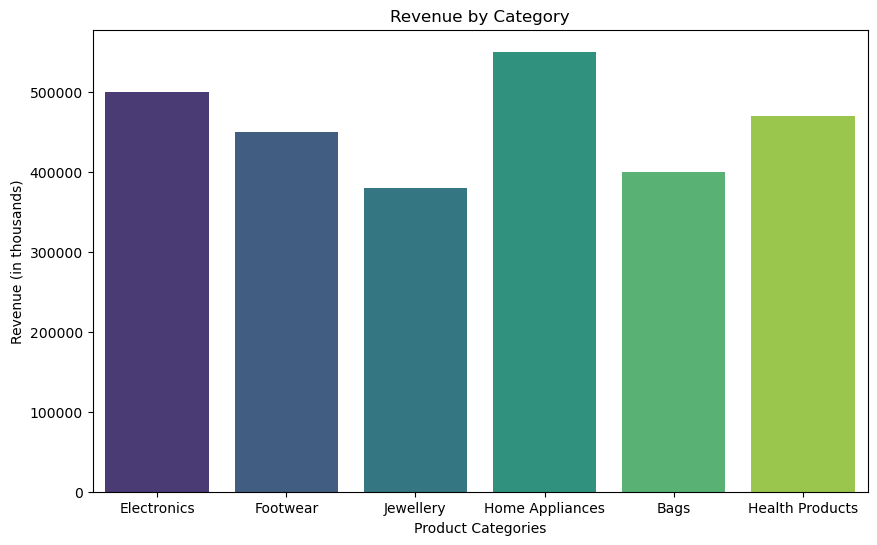

In [238]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data: categories and corresponding revenue
categories = ['Electronics', 'Footwear', 'Jewellery', 'Home Appliances', 'Bags', 'Health Products']
revenues = [500000, 450000, 380000, 550000, 400000, 470000]

# Creating the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=categories, y=revenues, palette='viridis')

# Adding titles and labels
plt.title('Revenue by Category')
plt.xlabel('Product Categories')
plt.ylabel('Revenue (in thousands)')

# Displaying the chart
plt.show()

##### Description:
1. Revenue by Category: This bar chart shows how much money each product category brings in. For example, Home Appliances generates more revenue than Footwear.
2. Insight: It helps identify which categories are performing the best and which ones may need more focus to boost sales.

#### Stock vs Sales (Scatter Plot)

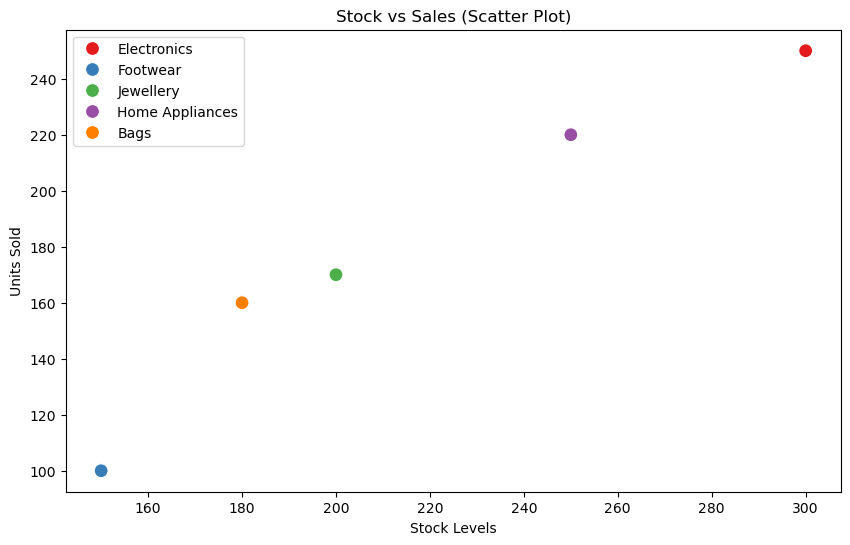

In [242]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data: categories, stock levels, and units sold
categories = ['Electronics', 'Footwear', 'Jewellery', 'Home Appliances', 'Bags']
stock = [300, 150, 200, 250, 180]
sales = [250, 100, 170, 220, 160]

# Creating the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=stock, y=sales, hue=categories, palette='Set1', s=100)

# Adding titles and labels
plt.title('Stock vs Sales (Scatter Plot)')
plt.xlabel('Stock Levels')
plt.ylabel('Units Sold')

# Displaying the plot
plt.show()

##### Description:
1. Stock vs Sales: This scatter plot shows the relationship between stock levels and units sold for each product. Products with more stock but low sales indicate potential overstocking.
2. Insight: Helps in identifying understocked products (selling out fast) and overstocked products (excess stock not selling).

#### Customer Ratings and Revenue (Box Plot)

C:\Users\saitarun\AppData\Local\Temp\ipykernel_9072\437385139.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Revenue', data=data, palette='Set2')


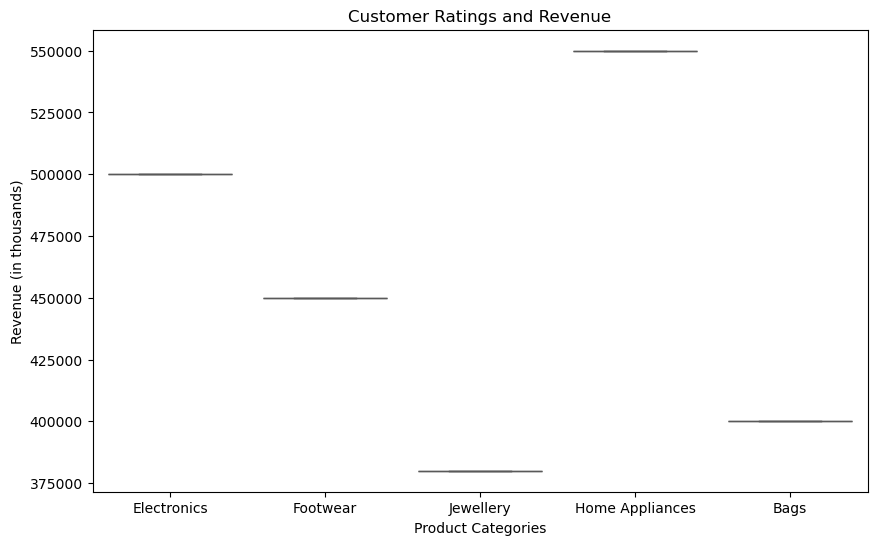

In [246]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data: categories, ratings, and revenue
categories = ['Electronics', 'Footwear', 'Jewellery', 'Home Appliances', 'Bags']
ratings = [4.2, 4.5, 4.3, 4.0, 4.4]
revenues = [500000, 450000, 380000, 550000, 400000]

# Creating a dataframe
import pandas as pd
data = pd.DataFrame({'Category': categories, 'Customer_Rating': ratings, 'Revenue': revenues})

# Creating the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Revenue', data=data, palette='Set2')

# Adding titles and labels
plt.title('Customer Ratings and Revenue')
plt.xlabel('Product Categories')
plt.ylabel('Revenue (in thousands)')

# Displaying the plot
plt.show()

##### Description:
1. Customer Ratings and Revenue: This box plot compares revenue distribution across categories, showing how products with higher customer ratings affect their sales.
2. Insight: The median line in the box shows average revenue, helping to identify which categories are performing well despite ratings.

#### Top 10 SKUs (Pareto Chart)

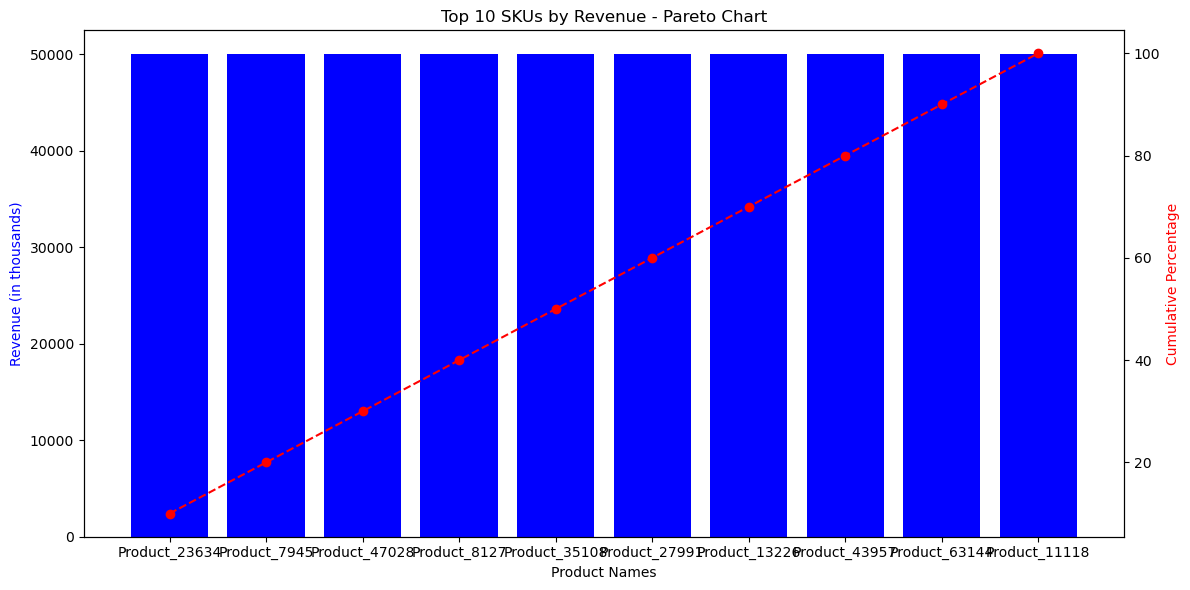

In [255]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Updated SKU data based on your top 10 SKUs and corresponding revenue
sku_data = {
    'Product_Name': ['Product_23634', 'Product_7945', 'Product_47028', 'Product_8127', 'Product_35108',
                     'Product_27991', 'Product_13226', 'Product_43957', 'Product_63144', 'Product_11118'],
    'Category': ['Kitchen Appliances', 'Health Products', 'Accessories', 'Bags', 'Beauty Products',
                 'Beauty Products', 'Bags', 'Bags', 'Bags', 'Men\'s Clothing'],
    'Revenue': [49999.50, 49999.07, 49997.73, 49997.56, 49997.44, 49996.46, 49996.21, 49995.29, 49994.48, 49994.05]
}

# Convert to DataFrame
df = pd.DataFrame(sku_data)

# Sort the data by Revenue in descending order
df_sorted = df.sort_values(by='Revenue', ascending=False)

# Calculate cumulative revenue percentage
df_sorted['Cumulative_Revenue'] = np.cumsum(df_sorted['Revenue']) / np.sum(df_sorted['Revenue']) * 100

# Creating the Pareto chart
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for Revenue by Product
ax1.bar(df_sorted['Product_Name'], df_sorted['Revenue'], color='blue')
ax1.set_xlabel('Product Names')
ax1.set_ylabel('Revenue (in thousands)', color='blue')

# Create a second y-axis for cumulative percentage
ax2 = ax1.twinx()
ax2.plot(df_sorted['Product_Name'], df_sorted['Cumulative_Revenue'], color='red', marker='o', linestyle='dashed')
ax2.set_ylabel('Cumulative Percentage', color='red')

# Adding titles
plt.title('Top 10 SKUs by Revenue - Pareto Chart')

# Adjusting x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotating labels and adjusting font size
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

##### Description:
1. Top 10 SKUs: This chart shows how a small number of SKUs contribute to the majority of total revenue. The bars represent revenue for each SKU, and the line shows the cumulative contribution.
2. Insight: The 80/20 rule is highlighted, showing that a few SKUs bring in the bulk of revenue.